## Factor Analysis: Finding Underlying Factors Within the General Economic Characteristics of American Communities that Affect the Poverty Rate.   

### Overview of the Dataset

General economic characteristics of American communities are broken down in detail by census tract ID number, county, and state. The features of this dataset pertain to the general economic and employment-related conditions of different demographic and racial groups.  

The data here represents general economic characteristics of all American census tracts and were collected by the US Census Bureau - each observation represents a numbered unique census tract. They are taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates. A typical census tract has around approximately 5000 residents.  

- Source: US Census Bureau
- Metric Variables: 34
- Categorical Variables: 2
- Number of Samples: 3,220 (by county)  

### Summary

Using the findings of previous analyses, we explored the possibility of other underlying factors relating to the poverty rate within a given Census tract, outside of race/ethnicity. The 5 factors that resulted from the analysis appear to clearly relate to certain aspects of the population within the dataset. **Factor 1** *is related to how much the worker is able to work from their home.* **Factor 2** *is related to how much the worker is impoverished, low income, and works in the Service industry.* **Factor 3** *is related to how much the person takes other transportation and does not drive to work.* **Factor 4** *relates to whether the worker is a white-collar professional and not working in a production or labor position.* **Factor 5** *relates to the degree of private sector work that the worker is engaged in.*  

For a given Census tract, a following analysis showed that for every increase of 1% of workers engaged in public jobs, the Poverty rate increases by **2.59%.** For every increase of 1% of professional white-collar workers, the Poverty rate decreases by **3.22%.** For every increase of 1% of self employed workers, the Poverty rate decreases by **0.79%.** For every increase of 1% of workers in the Census tract that drive themselves to work, the resulting Poverty rate increases by **0.18%.**  

Our analysis has shown that underlying the surface characteristics of this dataset, there are several significant entangled factors that have an effect on the Poverty rate of a given Census tract. Income, unemployment rate, working in the service industry, workers in public jobs, professional, self employed, and workers that self-drive are all predictors that have an effect on the poverty rate.  

Predictors that show an increasing effect are: Unemployment rate, percent in Service jobs, percent of workers in Public Work, and to a lesser extent, the percentage of workers that Self Drive. Predictors that show a decreasing effect are: the Income level, percentage of Professional workers, and percentage of Self Employed workers.  

### Feature Information:
```
['CensusId',          Census tract ID
 'State',             State, DC, or Puerto Rico (52 unique categories)
 'County',            County or county equivalent
 
 'TotalPop',          Total population
 'Men',               Number of men
 'Women',             Number of women
 
 'Hispanic',          % of population that is Hispanic/Latino
 'White',             % of population that is white
 'Black',             % of population that is black
 'Native',            % of population that is Native American or Native Alaskan
 'Asian',             % of population that is Asian
 'Pacific',           % of population that is Native Hawaiian or Pacific Islander
 
 'Citizen',           Number of citizens
 'Income',            Median household income
 'IncomeErr',         Median household income error 
 'IncomePerCap',      Income per capita
 'IncomePerCapErr',   Income per capita error
 
 'Poverty',           % under poverty level
 'ChildPoverty',      % of children under poverty level
 
 'Professional',      % employed in management, business, science, and arts
 'Service',           % employed in service jobs
 'Office',            % employed in sales and office jobs
 'Construction',      % employed in natural resources, construction, and maintenance
 'Production',        % employed in production, transportation, and material movement
 
 'Drive',             % commuting alone in a car, van, or truck
 'Carpool',           % carpooling in a car, van, or truck
 'Transit',           % commuting on public transportation
 'Walk',              % walking to work
 'OtherTransp',       % commuting via other means
 'WorkAtHome',        % working at home
 
 'MeanCommute',       Mean commute time (minutes)
 
 'Employed',          % employed (16+)
 'PrivateWork',       % employed in private industry
 'PublicWork',        % employed in public jobs
 'SelfEmployed',      % self-employed
 'FamilyWork',        % in unpaid family work
 
 'Unemployment']      Unemployment rate (%)
 ```
 ### Initial Exploratory Analysis: 
 
 An initial exploratory analysis was performed on the dataset in order to gain a sense of direction for our potential analytical methods. Bivariate scatterplots between the **Unemployment** rate and the **ethnic/racial** group percentage showed a strong correlation. There were clear patterns in the data indicating that the **Unemployment rate**, the **Child Poverty** rate, correlated either in a positive or negative direction depending on the ethnic/racial breakdown of a particular community. A bivariate scatterplot between the **Child Poverty** rate versus the percentage of whites in a county showed a moderate negative correlation, and the same plot with percentage of Hispanics showed an opposite relationship.  

After examining exploratory plots and relationships between variables, it was apparent that there were potential underlying factors or variables that drive the levels of **Unemployment** and **Child Poverty** rate, or **Income.** There was also be an opportunity to examine the economic differences between **Men** and **Women**, and their respective employment positions, i.e. **Professional, Office, Service, Construction, Production,** and **Public Work** or **Private Work.** A principal component analysis was later performed, aiming to find a relationship between the different demographic and/or racial groups (6 categories) and these respective professional groups. A factor analysis was also later performed on a slightly different subset of the dataset features than was used on the PCA, hoping to find other underlying factors that relate to these economic characteristics. 

In [2]:
library(stats)
library(corrplot)
library(car)
library(QuantPsyc)
library(leaps)
library(psych)
library(ggplot2)
library(lars)
library(caret)
library(klaR)

Load the dataset:

In [6]:
df = read.csv('acs2015_county_data.csv')
head(df)

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0


In [7]:
dim(df)

[1] 3220   37

Our dataframe contains 3,220 observations and 37 feature columns.

In [8]:
df = na.omit(df)
dim(df)

[1] 3218   37

### We need to pull a meaningful subset of the features to perform a PCA:

### Scale the features:

In [9]:
#scale the features:
df['Men_perc'] = df['Men'] / (df['Men'] + df['Women'])
df['Women_perc'] = df['Women'] / (df['Men'] + df['Women'])
df['Employed_thousands'] = df['Employed'] / 1000
df['Income_thousands'] = df['Income'] / 1000

Rebuild the dataframe with new scaled features:

In [10]:
df = df[, c('Poverty', 
            'Women_perc', 
            'Income_thousands', 
            'Professional', 
            'Service', 
            'Office', 
            'Construction', 
            'Production', 
            'Drive', 
            'Carpool', 
            'Transit', 
            'Walk', 
            'OtherTransp', 
            'WorkAtHome', 
            'MeanCommute', 
            'Employed_thousands', 
            'PrivateWork', 
            'PublicWork', 
            'SelfEmployed', 
            'FamilyWork', 
            'Unemployment')]

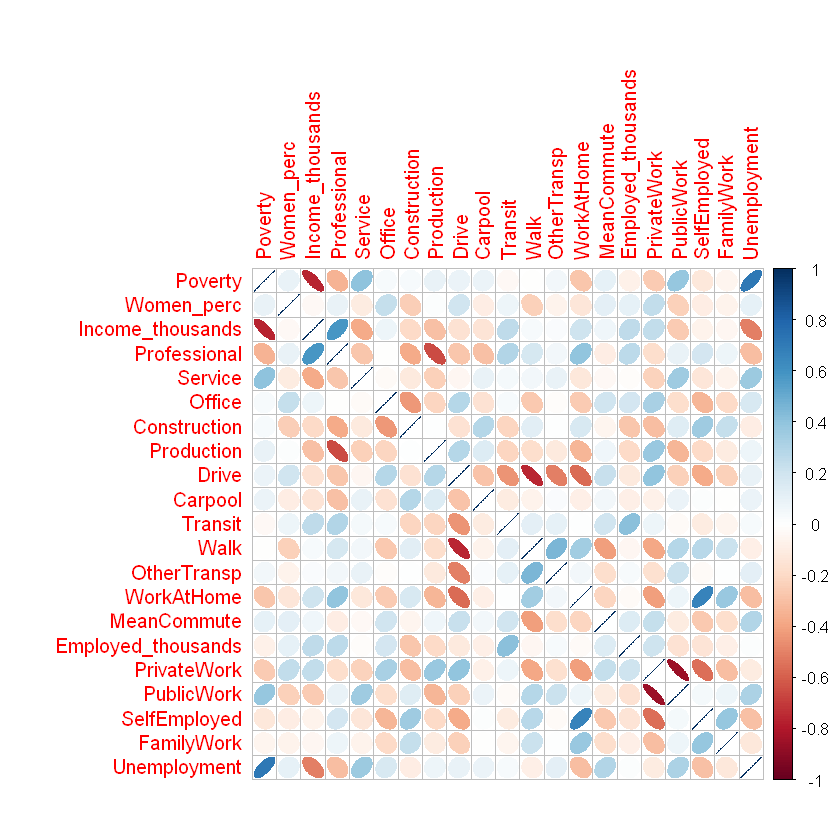

In [11]:
corr_matrix = cor(df)
corrplot(corr_matrix, method = 'ellipse')

Initially viewing the correlation matrix, we saw that the **Poverty** rate showed several interesting correlations. The strongest appearing negative correlations to the Poverty rate are the **Income, Professional, Work At Home,** and **Private Work.** The strongest positively correlated variables to the Poverty rate are the **Service** (percentage of service workers), **Public Work,** and **Unemployment** rate. The Unemployment rate is negatively correlated to the **Income, Professional percentage, Work At Home, and Self Employed.** Unemployment rate is positively correlated with the **Poverty rate, percent Service workers, Mean Commute Time,** and **Public Work**.  

**Production** is negatively correlated to **Professional**, which makes intuitive sense, as these are very different forms of work. **Service** is showing an interesting negative correlation to **Income**, meaning that people employed in the service industries are more likely to have a lower income level. **Men** and **Women** appear to share almost the same correlations to all variables, which may mean that gender does not have a significant effect.  

### Use a principal component analysis to get the number of components: 
- Use the Eigenvector of the correlation matrix: 

In [12]:
# use the Eigenvectors of the correlation matrix:
pca = prcomp(df, scale. = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.0766 1.8824 1.5881 1.26892 1.13748 1.09647 0.95210
Proportion of Variance 0.2053 0.1687 0.1201 0.07667 0.06161 0.05725 0.04317
Cumulative Proportion  0.2053 0.3741 0.4942 0.57085 0.63246 0.68971 0.73288
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.92606 0.8886 0.81760 0.80099 0.79282 0.73378 0.65413
Proportion of Variance 0.04084 0.0376 0.03183 0.03055 0.02993 0.02564 0.02038
Cumulative Proportion  0.77372 0.8113 0.84315 0.87370 0.90363 0.92927 0.94964
                         PC15    PC16    PC17    PC18     PC19     PC20    PC21
Standard deviation     0.6131 0.54759 0.50709 0.35270 0.006816 0.005935 0.00519
Proportion of Variance 0.0179 0.01428 0.01225 0.00592 0.000000 0.000000 0.00000
Cumulative Proportion  0.9676 0.98183 0.99407 0.99999 1.000000 1.000000 1.00000

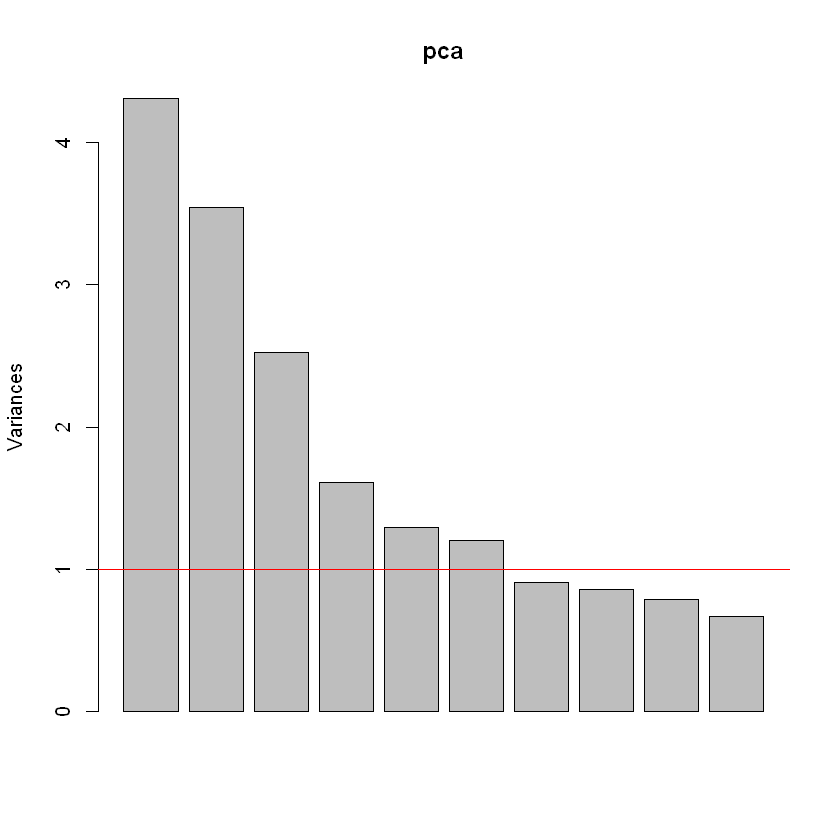

In [13]:
plot(pca)
abline(1, 0, col='red')

We have **6 components** that captures approximately **68.97%** of the total variance within the data.  

### Use component rotation (Varimax):

In [14]:
pca_varimax = psych::principal(df, nfactors = 6, rotate = 'varimax', scores = TRUE)
print(pca_varimax$loadings, cutoff = 0.4, sort = TRUE)


Loadings:
                   RC2    RC1    RC3    RC4    RC5    RC6   
Poverty             0.908                                   
Income_thousands   -0.849                                   
Professional       -0.505         0.421                0.452
Unemployment        0.804                                   
WorkAtHome                 0.737                            
SelfEmployed               0.841                            
FamilyWork                 0.661                            
Production                       -0.730                     
PrivateWork               -0.496 -0.713                     
PublicWork                        0.797                     
Drive                                   -0.708 -0.426       
Walk                                     0.823              
OtherTransp                              0.754              
MeanCommute                             -0.560  0.488       
Transit                                         0.792       
Employed_thou

### Factor Analysis: Are There Clear Underlying Factors Possibly Relating to the Poverty Rate?  

A factor analysis was performed in order to determine what factors may be intertwined within the dataset, and may possibly be driving the rate of impoverished workers and impoverished children. A principal component analysis performed earlier using the larger set of features showed strong loadings with the **ethnic/racial** groups. This factor analysis will omit the 6 racial groups, and try to determine underlying factors that **_exist outside of race/ethnicity._**  

The ACS dataset broken down by County was imported into the R statistical computing system as a dataframe. The dataset initially contained 3,220 observations, and 37 feature columns. A subset of 25 features were chosen for the analysis: Child Poverty, Poverty, Men, Women, Income, Professional, Service, Office, Construction, Production, Drive, Carpool, Transit, Walk, Other Transp, Work At Home, MeanCommute, Employed, Private Work, Public Work, Self Employed, Family Work, and Unemployment.  

After a few iterations of the factor analysis, it was decided to drop overly correlated variables that were causing mathematical warnings in the calculation. **Child Poverty** was dropped in favor of the **Poverty rate**, as their correlations with the rest of the dataset were nearly identical. The **Men** and **Women** were replaced by a single scaled feature, the percentage of Women (**Women_perc**), and the Employed and Income features were replaced by their respective numbers divided by 1,000 (**Employed_thousands, Income_thousands**). This brought them down to a similar numerical range with the rest of the dataset.  

This resulted in 21 features that were used with the factor analysis: **Poverty, Women_perc, Income_thousands, Professional, Service, Office, Construction, Production, Drive, Carpool, Transit, Walk, Other Transp, Work At Home, Mean Commute time, Employed_thousands, Private Work, Public Work, Self Employed, Family Work, and Unemployment.**  

An initial principal component analysis was performed to gauge the approximate number of components to use for the factor analysis. 6 components appeared to be most descriptive, all having Eigenvalues greater than 1 according to a scree plot, and captured approximately 68.9% of the total variance within the data. We initially ran the factor analysis calculation with a setting of 6 factors, however the resulting loadings indicated that Factor6 was only lightly loaded with one variable, the factor analysis was re-run with 5 factors. The 5 resulting factors captured approximately **54.8%** of the explained variance. 

In [15]:
fa = factanal(df, factors = 5)

In [16]:
print(fa$loadings, cutoff = 0.4, sort = TRUE)


Loadings:
                   Factor1 Factor2 Factor3 Factor4 Factor5
WorkAtHome          0.674                                 
SelfEmployed        0.992                                 
Poverty                     0.950                         
Income_thousands           -0.799                         
Unemployment                0.723                         
Drive              -0.439          -0.887                 
Transit                             0.533                 
Walk                                0.661                 
OtherTransp                         0.550                 
Professional                                0.862         
Production                                 -0.632         
PrivateWork        -0.610                           0.724 
PublicWork                                         -0.898 
Women_perc                                                
Service                     0.425                         
Office                                       

### The factor loadings:  

With 5 factors, we have captured approximately **54.8%** of the total variance within our data subset.  

Examining the factor loadings, we saw that Factor2 was loaded with Poverty, Income, Unemployment, and Service. This was an interesting finding, as the percentage of Service workers were the only occupational category loaded on this factor out of the total set of Professional, Service, Office, Construction, Production, and Self Employed workers. This is an indication that working in a Service industry may be a significant predictor in a worker’s level of Poverty. The factor scores are expressed as:  

- **Factor1** = (0.674 \* WorkAtHome) + (0.992 \* SelfEmployed) + (0.407 \* FamilyWork)
 - **realtes to how much the worker is able to work from their home**
 - **possible name: Works at Home**  


- **Factor2** = (0.950 \* Poverty) - (0.799 \* Income_thousands) + (0.723 \* Unemployment) + (0.425 \* Service)
 - **realtes to how much the person is impoverished, low income, and works in a service industry**
 - **possible name: Impoverished**  


- **Factor3** = - (0.887 \* Drive) + (0.533 \* Transit) + (0.661 \* Walk) + (0.550 \* OtherTransp)
 - **relates to how much the person takes other transportation and does not drive to work**
 - **possible name: Does Not Drive**  


- **Factor4** = (0.862 \* Professional) - (0.632 \* Production) - (0.492 \* Construction)
 - **relates to the degree of white collar work and not labor jobs**
 - **possible name: White-collar Worker**  


- **Factor5** = (0.724 \* PrivateWork) - (0.898 \* PublicWork)
 - **relates to the degree of public sector work the worker is engaged in**
 - **possible name: Public Sector Worker**  

The 5 factors that resulted from the factor analysis appear to clearly relate to certain aspects of the population within the dataset. **Factor1** *is related to how much the worker is able to work from their home.* **Factor2** *is related to how much the worker is impoverished, low income, and works in the Service industry.* **Factor3** *is related to how much the person takes other transportation and does not drive to work.* **Factor4** *relates to whether the worker is a white-collar professional and not working in a production or labor position.* **Factor5** *relates to the degree of private sector work that the worker is engaged in.* The ratio of Women to Total population (**Women percentage**) did not show any loading greater than our threshold on any of our factors, which was a surprising finding. Again, the loading of **Service** workers on Factor2 is a relatively unique occurrence with the loadings breakdown relative to the other professional categories, and requires some further analysis. 

### Surrogate Regression Analysis: 

We then chose the most highly loaded variables from each of these 5 factors as surrogates and ran a regression model, using the **Poverty** as the response variable. The independent surrogate variables were chosen as **Self Employed** (from Factor1), **Drive** (from Factor3), **Professional** (from Factor4), and **Public Work** (from Factor5).  

The response variable Poverty rate had to be log transformed, as it was right-skewed. The resulting feature log_Poverty was approximately normally distributed, and log_Poverty was used in the regression fitting.  

### Check regression model assumptions:
- transform response
- transform predictors?
- multicollinearity?
- residual plots

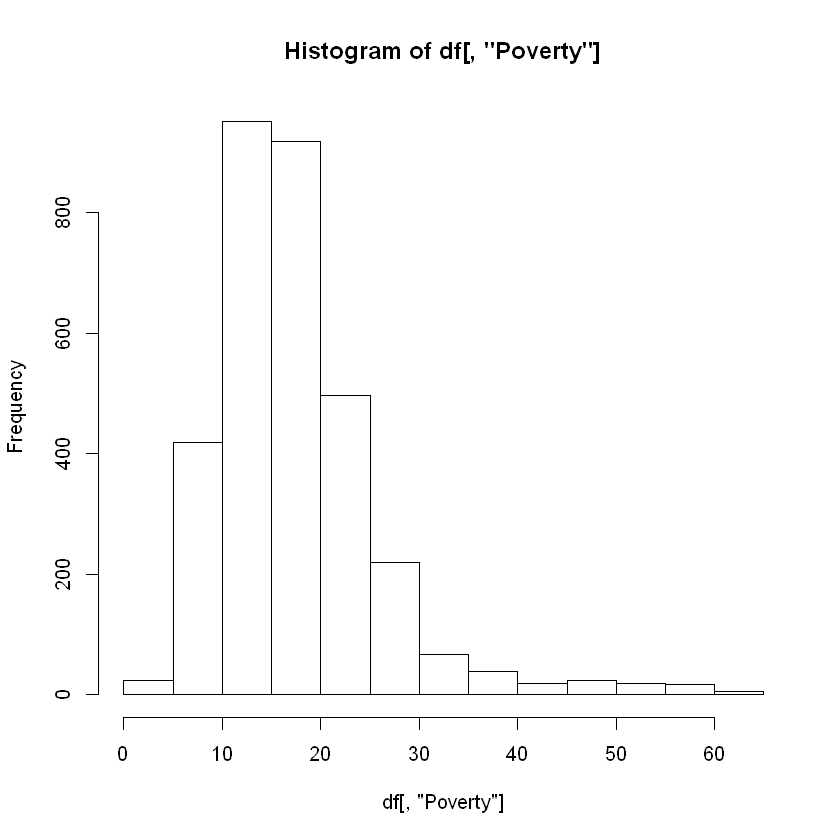

In [17]:
# eliminate the skewness of the Poverty response variable:
hist(df[, 'Poverty'])

In [18]:
df['log_Poverty'] = log(df[, 'Poverty'])

The use of a forward model selection was used to determine the significance of the surrogate predictors. A k-fold cross validation was used to validate the model, a value of k=3 was chosen, giving us 3 samples of 2145, 2147, and 2144 observations. The residuals were approximately normally distributed. The variance inflation factors were all between 1.06 to 1.28, indicating that multicollinearity is not a problem with the model. 

In [19]:
# choose some surrogates from the factors:
null = lm(log_Poverty ~ 1, data = df)
full = lm(log_Poverty ~ SelfEmployed + Drive + Professional + PublicWork, data = df)
linear_regressor_fw = step(null, scope=list(lower=null, upper=full), direction='forward')

Start:  AIC=-5289.11
log_Poverty ~ 1

               Df Sum of Sq    RSS     AIC
+ Professional  1   122.317 499.28 -5992.3
+ PublicWork    1    64.146 557.45 -5637.6
+ SelfEmployed  1    14.019 607.58 -5360.5
+ Drive         1     5.171 616.43 -5314.0
<none>                      621.60 -5289.1

Step:  AIC=-5992.25
log_Poverty ~ Professional

               Df Sum of Sq    RSS     AIC
+ PublicWork    1    83.252 416.03 -6577.3
+ SelfEmployed  1     3.074 496.21 -6010.1
+ Drive         1     0.548 498.73 -5993.8
<none>                      499.28 -5992.3

Step:  AIC=-6577.26
log_Poverty ~ Professional + PublicWork

               Df Sum of Sq    RSS     AIC
+ SelfEmployed  1    3.8997 412.13 -6605.6
+ Drive         1    1.7435 414.28 -6588.8
<none>                      416.03 -6577.3

Step:  AIC=-6605.57
log_Poverty ~ Professional + PublicWork + SelfEmployed

        Df Sum of Sq    RSS     AIC
+ Drive  1   0.46704 411.66 -6607.2
<none>               412.13 -6605.6

Step:  AIC=-6607.22


In [20]:
summary(linear_regressor_fw)


Call:
lm(formula = log_Poverty ~ Professional + PublicWork + SelfEmployed + 
    Drive, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14246 -0.22448  0.00846  0.21508  1.37498 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2176295  0.0964849  33.349  < 2e-16 ***
Professional -0.0316669  0.0010344 -30.614  < 2e-16 ***
PublicWork    0.0255969  0.0010086  25.379  < 2e-16 ***
SelfEmployed -0.0079037  0.0017467  -4.525 6.26e-06 ***
Drive         0.0017948  0.0009401   1.909   0.0563 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3579 on 3213 degrees of freedom
Multiple R-squared:  0.3377,	Adjusted R-squared:  0.3369 
F-statistic: 409.6 on 4 and 3213 DF,  p-value: < 2.2e-16


In [21]:
# check residual plot:
residuals = resid(linear_regressor_fw)

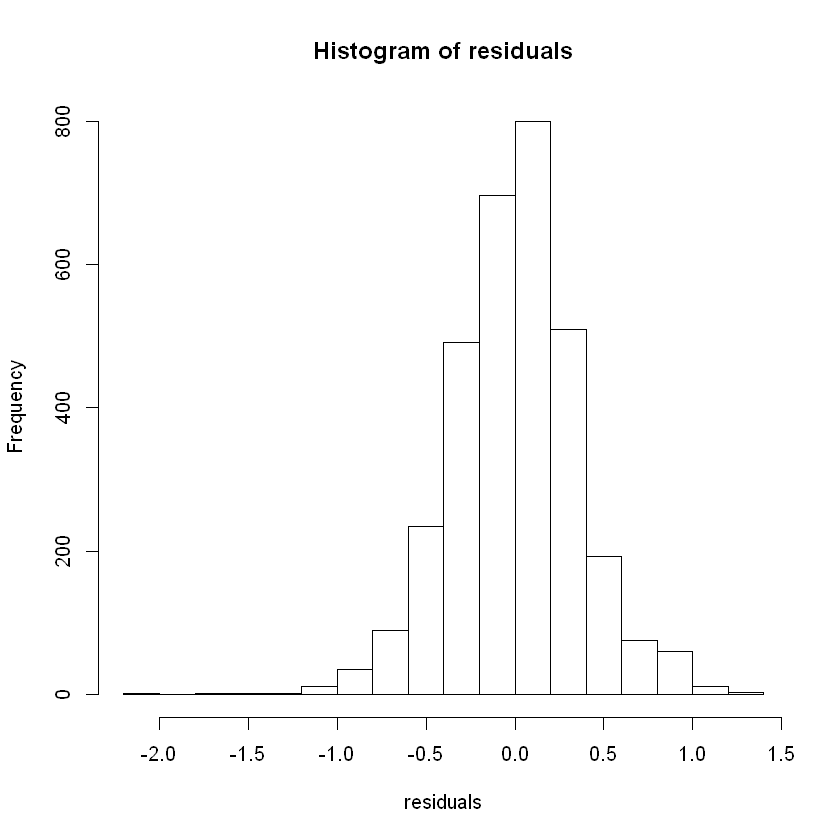

In [22]:
hist(residuals)

### Use k-fold cross validation to train and validate the regression model:
- Our k = 3

In [23]:
train_control = trainControl(method = 'cv', number = 3, savePredictions = TRUE)

#train the model
linear_reg_cv = train(log_Poverty ~ SelfEmployed + Drive + Professional + PublicWork, data=df, 
                      trControl=train_control, method='lm')

In [24]:
summary(linear_reg_cv)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14246 -0.22448  0.00846  0.21508  1.37498 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2176295  0.0964849  33.349  < 2e-16 ***
SelfEmployed -0.0079037  0.0017467  -4.525 6.26e-06 ***
Drive         0.0017948  0.0009401   1.909   0.0563 .  
Professional -0.0316669  0.0010344 -30.614  < 2e-16 ***
PublicWork    0.0255969  0.0010086  25.379  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3579 on 3213 degrees of freedom
Multiple R-squared:  0.3377,	Adjusted R-squared:  0.3369 
F-statistic: 409.6 on 4 and 3213 DF,  p-value: < 2.2e-16


In [25]:
print(linear_reg_cv)

Linear Regression 

3218 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 2145, 2146, 2145 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3585599  0.3347399  0.2724456

Tuning parameter 'intercept' was held constant at a value of TRUE


In [26]:
vif(linear_regressor_fw)

Professional   PublicWork SelfEmployed        Drive 
    1.089614     1.065285     1.173749     1.286662

### Interpret the coefficients: 

The model equation was found to contain all 4 predictors, and all were statistically significant.  

**_log(Poverty) = 3.2176 - (0.0079 \* SelfEmployed) + (0.0018 \* Drive) - (0.03167 \* Professional) + (0.0256 \* PublicWork)_**    

- **SelfEmployed:** (exp (0.0079037) – 1) \* 100 = **0.79% decrease in Poverty rate.**
- **Drive:** (exp (0.0017948) – 1) \* 100 = **0.18% increase in Poverty rate.**
- **Professional:** (exp (0.0316669) – 1) \* 100 = **3.22% decrease in Poverty rate.**
- **PublicWork:** (exp (0.0255969) – 1) \* 100 = **2.59% increase in Poverty rate.**  

### Findings:  

For a given Census tract, the regression equation shows that for every increase of 1% of workers engaged in **public jobs,** the Poverty rate increases by **2.59%.** For every increase of 1% of **professional white-collar workers,** the Poverty rate decreases by **3.22%.** For every increase of 1% of **self employed workers,** the Poverty rate decreases by **0.79%.** For every increase of 1% of workers in the Census tract that **drive themselves to work,** the resulting Poverty rate increases by **0.18%.**  

Our factor analysis and the subsequent regression analysis have shown that underlying the features of this dataset, there are several significant entangled factors that have an effect on the Poverty rate of a given Census tract. **Income, unemployment rate, working in the service industry, workers in public jobs, professional, self employed,** and **workers that self-drive** are all predictors that have an effect on the poverty rate.  
<hr>
Predictors that show an increasing effect are: **Unemployment** rate, percent in **Service** jobs, percent of workers in **Public Work,** and to a lesser extent, the percentage of workers that **Self Drive.**  

Predictors that show a decreasing effect are: the **Income** level, percentage of **Professional** workers, and percentage of **Self Employed workers.**  